# **plotting the av mutability for the sims** 

In [5]:
import matplotlib.pyplot as plt
import json 

In [22]:
avMut = json.load(open("data/Trial3_avMutability_cds_invariant50.txt"))
exonMut = json.load(open("data/Trial3_exonMut_cds_invariant50.txt"))
intronMut = json.load(open("data/Trial3_intronMut_cds_invariant50.txt"))

In [23]:
nGensList = [i for i in range(len(avMut))]

In [24]:
dna = (open("data/Trial3_DNA_gen0_cds.txt")).readlines()[0]

In [25]:
len(dna)

10745

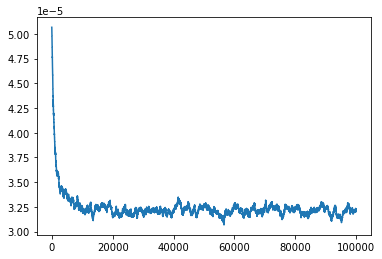

In [32]:
plt.plot(nGensList, avMut)
# plt.xlim(0,8000)
plt.show()

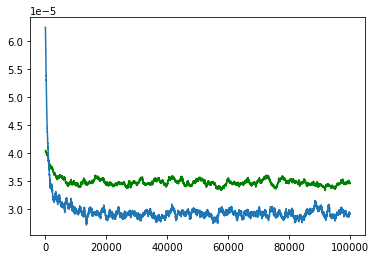

In [40]:
plt.plot(nGensList, exonMut, color = "green")
plt.plot(nGensList, intronMut)
# plt.xlim(0,8000)
plt.show()

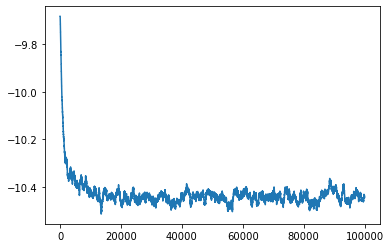

In [58]:
plt.plot(nGensList, np.log(intronMut))
# plt.xlim(0,8000)
plt.show()

In [66]:
tmp_logLog = np.log((np.log(intronMut))+12)
# tmp_logLog = np.log(tmp_logLog)

In [67]:
tmp_logLog

array([0.84096366, 0.84096366, 0.84096366, ..., 0.44251397, 0.44251397,
       0.44251397])

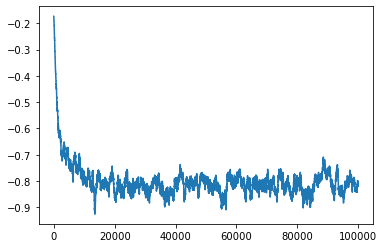

In [69]:
plt.plot(nGensList, np.log(tmp_logLog))
# plt.xlim(0,8000)
plt.show()

# **fitting exponenetial curve** 

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [34]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

x = np.linspace(0,4,50)
y = func(x, 2.5, 1.3, 0.5)
yn = y + 0.2*np.random.normal(size=len(x))

popt, pcov = curve_fit(func, x, yn)

array([1.79175947, 1.60943791])

In [45]:
popt, pcov = curve_fit(func, nGensList, [100000*i for i in intronMut])

<ipython-input-34-5a4beb2b6492>:2: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
<ipython-input-34-5a4beb2b6492>:2: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c


In [44]:
[5*i for i in [1,1,1,1,1,1]]

[5, 5, 5, 5, 5, 5]

In [ ]:
plt.figure()
plt.plot(nGensList, intronMut, 'ko', label="Original Noised Data")
plt.plot(nGensList, func(nGensList, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()